In [1]:
import pandas as pd
import numpy as np
import matplotlib
from ggplot import diamonds

In [2]:
matplotlib.style.use('ggplot')

In [3]:
%matplotlib inline

使用ggplot自带的diamonds 数据集

In [4]:
# check the data shape
diamonds.shape

(53940, 10)

In [5]:
diamonds.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object

In [6]:
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [7]:
diamonds.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

## Histograms

直方图是单变量图，将数值变量分组，“组”为数值区间。用于观察数值变量的 数值分布情况。

条形图barplots 针对的分类变量，“组”为类别。用于对类别进行频数统计。

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1033d9860>]], dtype=object)

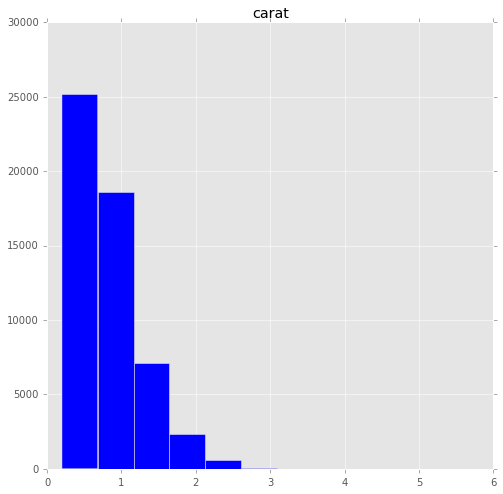

In [8]:
# diamond carat
diamonds.hist(column='carat',   # 单变量，可直接用.hist，而不用.plot(kind='hist')
              figsize=(8,8),   # 可选参数。指定尺寸
              color='blue')     # 可选参数

图中显示：数据右偏，大部分钻石重量在1克拉左右，极少数很大个.

上图的组宽设置得宽泛，无法看出3.5克拉以上等更精细的数据，下面调整组宽和X轴限：

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x118529358>]], dtype=object)

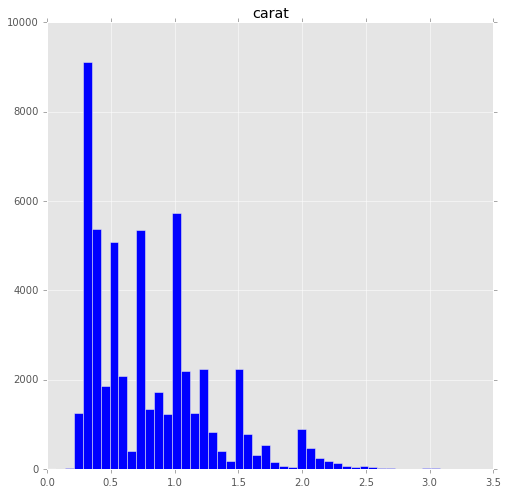

In [9]:
diamonds.hist(column='carat',
              figsize=(8,8),
              color='blue',
              bins=50,         # 组数
              range=(0,3.5))   # X轴限

In [10]:
#若数据量很大，即使调整了组数和X轴限，但仍然很难保证 直方图展现了全部的数据，尤其是一些数量少的异常数据。比如是否有3.5克拉以上的特大钻石：

diamonds[diamonds['carat']>3.5]

,carat,cut,color,clarity,depth,table,price,x,y,z
23644,3.65,Fair,H,I1,67.1,53.0,11668,9.53,9.48,6.38
25998,4.01,Premium,I,I1,61.0,61.0,15223,10.14,10.10,6.17
25999,4.01,Premium,J,I1,62.5,62.0,15223,10.02,9.94,6.24
26444,4.00,Very Good,I,I1,63.3,58.0,15984,10.01,9.94,6.31
26534,3.67,Premium,I,I1,62.4,56.0,16193,9.86,9.81,6.13
27130,4.13,Fair,H,I1,64.8,61.0,17329,10.00,9.85,6.43
27415,5.01,Fair,J,I1,65.5,59.0,18018,10.74,10.54,6.98
27630,4.50,Fair,J,I1,65.8,58.0,18531,10.23,10.16,6.72
27679,3.51,Premium,J,VS2,62.5,59.0,18701,9.66,9.63,6.03


## Boxplots

单变量图

pd.boxplot()

/Users/mac/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:2: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
  from ipykernel import kernelapp as app


count    53940.000000
mean         0.797940
std          0.474011
min          0.200000
25%          0.400000
50%          0.700000
75%          1.040000
max          5.010000
Name: carat, dtype: float64

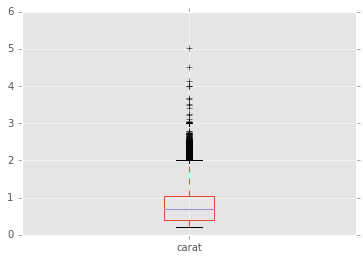

In [11]:
# make a boxplot of carat
diamonds.boxplot(column='carat')
diamonds.carat.describe()  # 五数概括

* 触须线（whiskers)延伸到最大（小）值；
* 上界为Q3+1.5IQR，下界为Q1-1.5IQR;
* 触须线< 界线；
* 通常界外的视为异常点。

这里数据集有50000个点，有许多点在界外，我们不可能将它们全当作异常点。但少数几个4克拉以上的，是明显远离正态的。

箱线图的一个用途是，一个数值变量的箱线图，可以并排拆分在 一个分类变量的不同水平上，例如clarity变量的不同透明度水平对应的价格：

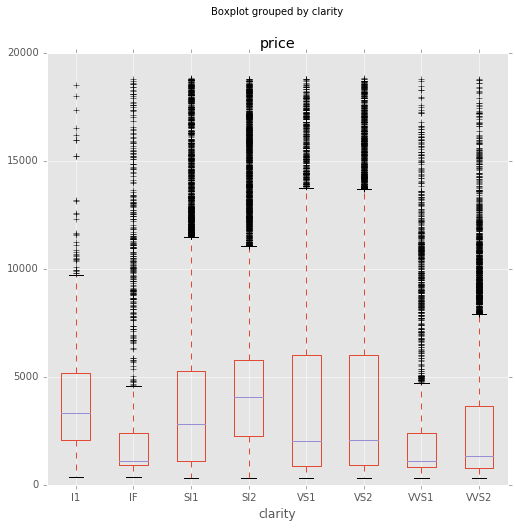

In [12]:
#make a side-by-side boxplot of diamond price split by diamond clarity
diamonds.boxplot(column="price",        # Column to plot
                 by= "clarity",         # Column to split upon
                 figsize= (8,8),
                 )     

一个奇怪的发现是：原以为透明度越高，价格也越高，但图中显示，透明度最高等级IF无瑕级的中位数价格却小于 透明度低的。为什么？也许其他变量制约了透明度对价格的影响，或者说 对价格的影响 比 透明度因素 更大：

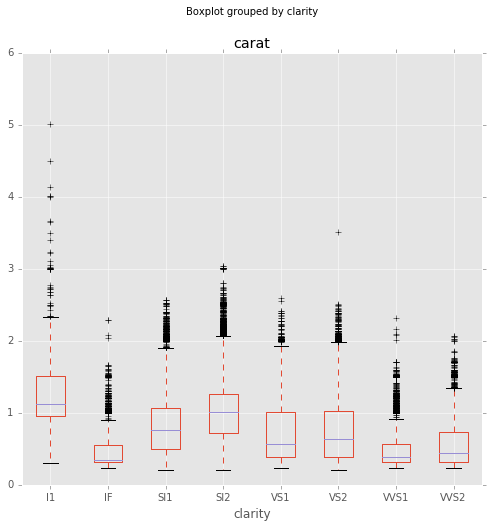

In [13]:
diamonds.boxplot(column='carat',
                 by='clarity',
                 figsize=(8,8))

上图显示出，低透明度的钻石，个头越大，而尺寸因素更能决定价格。

## Density Plots

密度图是【连续的曲线】，反映【一个数值变量】的分布。与直方图类似，但没有【离散的分组组别】。

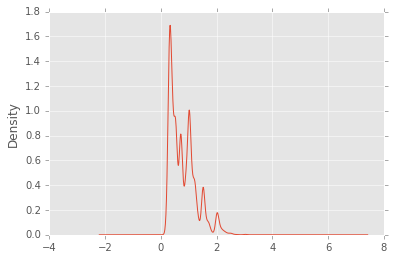

In [14]:
# Create a density plot with 【series】.plot(kind="density")

diamonds['carat'].plot(kind='density')

## Barplots

条形图展示【分类变量】的频数统计


In [15]:
# 先创建某一变量的（一维）频数统计表：pd.crosstab():  
# 也可以用value_counts()，但对单变量适用，2维及以上要groupby('Survived')，但效果不好。制表更直接些

carat_table = pd.crosstab(index=diamonds['clarity'],columns='count')
carat_table

col_0,count
clarity,
I1,741
IF,1790
SI1,13065
SI2,9194
VS1,8171
VS2,12258
VVS1,3655
VVS2,5066


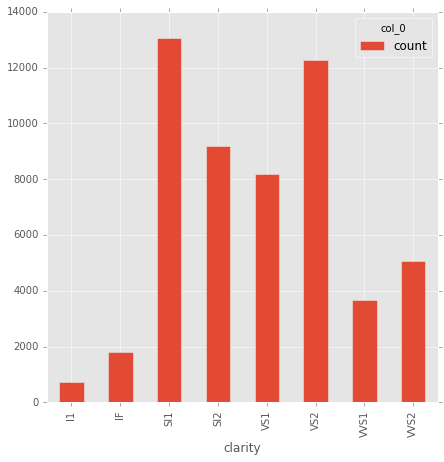

In [16]:
# 再传入df.plot(kind='bar'):

carat_table.plot(kind='bar',
                figsize=(7,7))

### 也可以用2维表创建 **stacked barplots**

Stacked barplots 除了显示第一个分类变量的频数，

还反映 【第二个分类变量】在每条条形里 的分布：

In [17]:
carat_table = pd.crosstab(index= diamonds['clarity'],
                          columns=diamonds['color'])
carat_table

color,D,E,F,G,H,I,J
clarity,,,,,,,
I1,42,102,143,150,162,92,50
IF,73,158,385,681,299,143,51
SI1,2083,2426,2131,1976,2275,1424,750
SI2,1370,1713,1609,1548,1563,912,479
VS1,705,1281,1364,2148,1169,962,542
VS2,1697,2470,2201,2347,1643,1169,731
VVS1,252,656,734,999,585,355,74
VVS2,553,991,975,1443,608,365,131


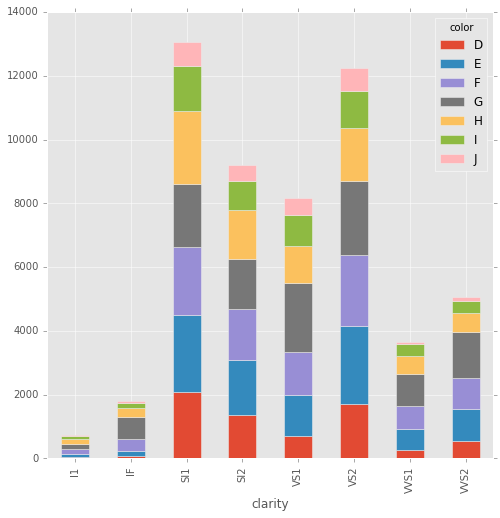

In [43]:
carat_table.plot(kind='bar',
                 figsize=(8,8),
                 stacked=True)  

### A grouped barplot 
is an alternative to a stacked barplot that gives each stacked section its own bar. 

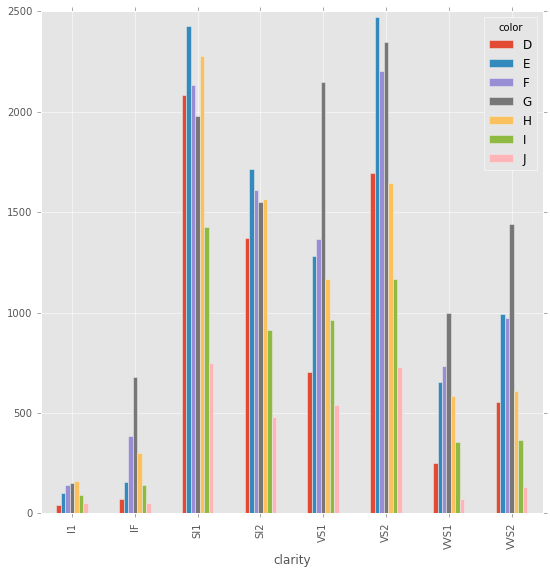

In [18]:
carat_table.plot(kind='bar',
                 figsize=(9,9),
                 stacked=False)

## Scatterplots  
另见文档http://pandas.pydata.org/pandas-docs/version/0.18.1/visualization.html matplotlib 中的参数，这里也可以用，比如 c : color, sequence, or sequence of color, optional, default: ‘b’

两个变量(x,y),且是数值变量

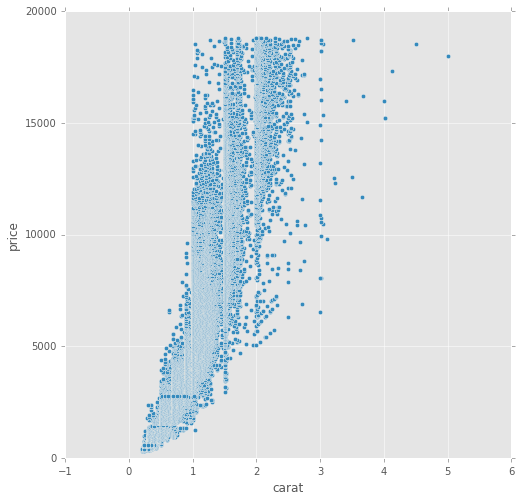

In [19]:
diamonds.plot(kind='scatter',     # 可加入参数c='数值列列名' 作分类（如0，1）区分
                                  
              x='carat',
              y='price',
              figsize=(8,8),
              ylim=(0,20000))   # 只展示y轴0-20000的部分

尽管有很多点重叠，但还是能直观看出钻石克拉数与价格的关系：越重，价格通常越高

## Line Plots

线形图反映 一个数值变量 随另一个 顺序变量 的变化情况。常用于时间序列数据。

df.plot()默认用线型图

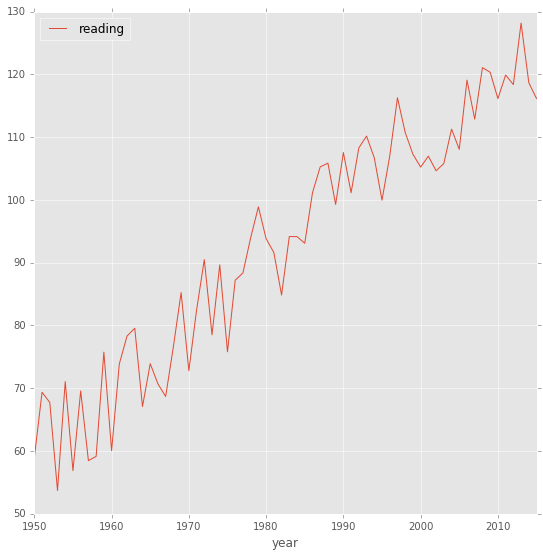

In [20]:
# Create some data
years = [y for y in range(1950,2016)]

readings = [(y + np.random.uniform(0,20)-1900) for y in years]

times_df = pd.DataFrame({'year':years,'reading':readings})

times_df.plot(x='year',
              y='reading',
             figsize=(9,9))

## Saving Plots

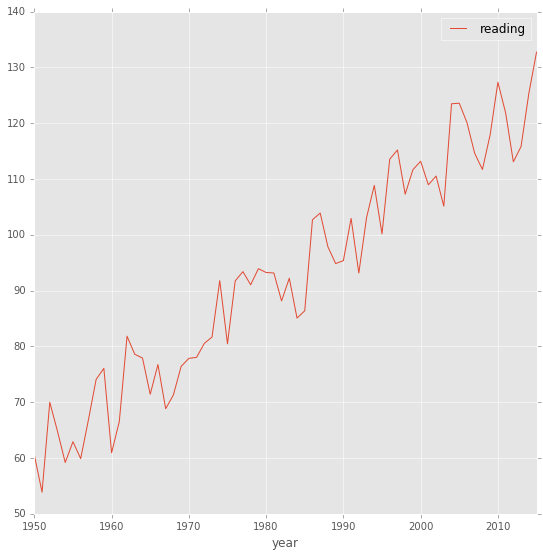

In [56]:
my_plot = times_df.plot(x='year',
                       y='reading',
                       figsize=(9,9))   # 1. 画图

my_fig = my_plot.get_figure()           # 2. .get_figure()

my_fig.savefig('line_plot.png')         # 3. .savefig()

# Wrap up

pandas 的作图函数 虽然没有专门的作图包全面，但够用了。

* Histgram:   
        univariate  numeric
* boxplot:    
        univariate  numeric; or (split/group by another categorical )
* density:   
        univariate  numeric
* barplot:  
        1 or 2 categorical
* Scatter:   
        bivariate  numeric
* Line:     
        bivariate  numeric,ordered
